# 1. 라이브러리 불러오기

In [52]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.utils import plot_model
import matplotlib.pyplot as plt # !pip install matplotlib # 외부에서 설치
import pydot
from PIL import Image, ImageOps

# 2. 데이터 읽어오기

In [2]:
# 훈련용(Train -> 질문 : 답), 평가용(test -> 질문 : 답) 데이터 분류해서 가져오기
# 데이터가 수정되면 안됨 -> 튜플로 가져오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data() # (Train), (test) -> 데이터를 8 : 2로 자동으로 나눔

In [3]:
# 데이터 확인
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape
# ((60000, 28, 28) -> 흑백 이미지(채널이 없음 -> 60000, 28, 28, 3 -> 컬러), (60000,), (10000, 28, 28), (10000,))
# 생략된 채널을 넣어줘야 한다. -> 구조를 reshape 사용해서 조정

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [24]:
# !pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.7/5.1 MB 21.5 MB/s eta 0:00:01
   ------------- -------------------------- 1.7/5.1 MB 21.4 MB/s eta 0:00:01
   ------------------------- -------------- 3.2/5.1 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  5.0/5.1 MB 29.5 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 24.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/152.4 kB ? eta -:--:--
   ---------------------------------------- 152.4/152.4 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB ? eta 0:00:00


  You can safely remove it manually.


In [4]:
import tensorflow_datasets as tfds # tf에서 제공되는 ds
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

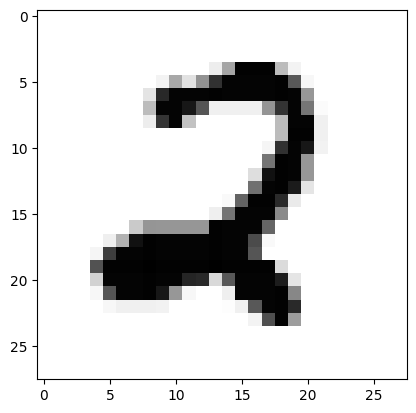

In [5]:
# train_images, train_labels 데이터 확인
plt.imshow(train_images[365], cmap = 'Greys')

In [6]:
train_labels[1235]

9

In [7]:
# 전처리 작업
train_images = train_images.reshape((60000, 28, 28, 1))

In [8]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [9]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
train_images[35556]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [11]:
# 0-255를 0과 1 사이의 실수로 변경
# train_images = train_images / 255.
# test_images = test_images / 255. -> 1줄로 처리
train_images, test_images = train_images / 255. , test_images / 255.

In [12]:
train_images[35556]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 3. 신경망 만들기

In [13]:
# Keras 모델 설계
model = models.Sequential()
# 32개의 레이어, 3X3 합성곱 필터, activation function은 relu(음수는 0으로, 양수는 그대로)
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1))) # input_shape는 최초 1번
model.add(layers.MaxPooling2D((2, 2))) # 절반으로
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # CNN의 경우 3배로 늘려주는 게 성능이 좋음
model.add(layers.MaxPooling2D((2, 2))) # 절반으로
model.add(layers.Conv2D(64, (3, 3), activation = 'relu')) # CNN의 경우 3배로 늘려주는 게 성능이 좋음
model.add(layers.MaxPooling2D((2, 2))) # 절반으로

C:\Users\hi\anaconda3\envs\p310_cnn\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

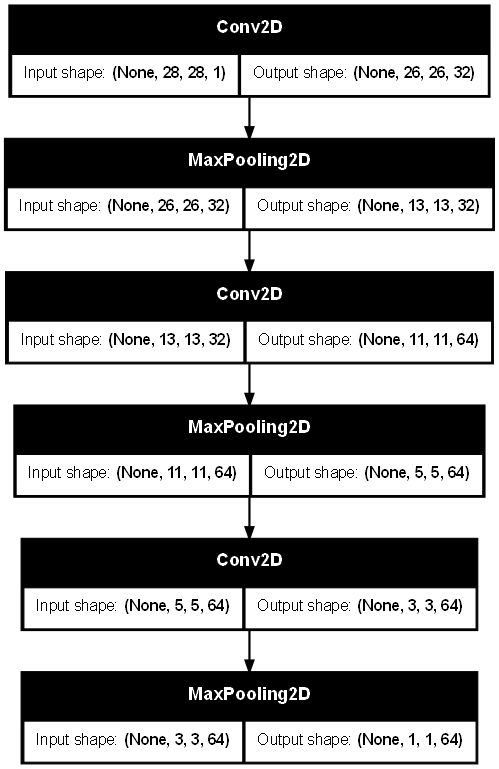

In [16]:
plot_model(model, show_shapes=True, dpi=80)

In [18]:
# 분류단계
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 학습 시키0에서 9까지라서

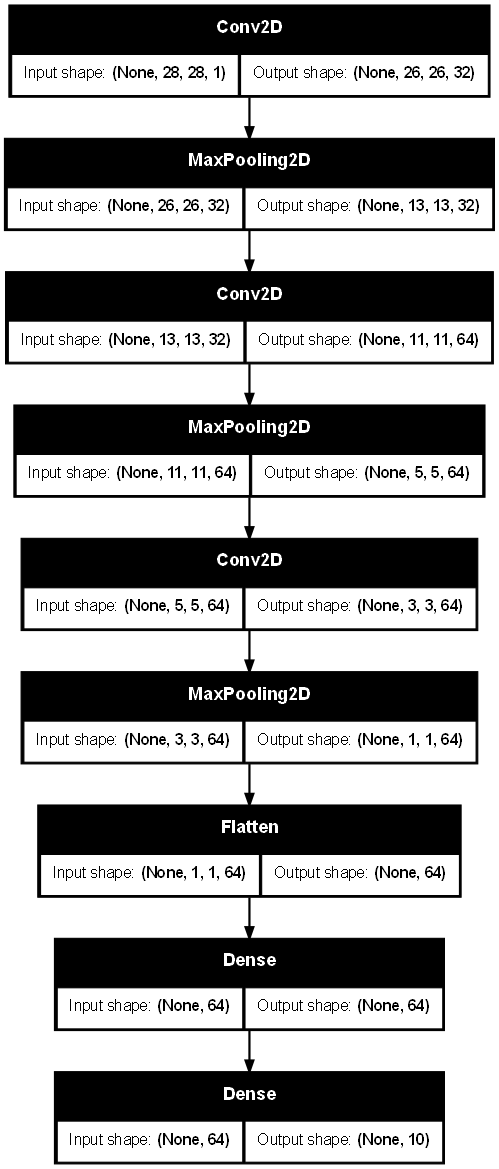

In [19]:
plot_model(model, show_shapes=True, dpi=80)

# 4. 모델 만들고 학습하기

In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']
)

In [22]:
# 모델 훈련 ->  # fit = 훈련 / verbose = 학습 상황 표시
history = model.fit(train_images, train_labels, batch_size = 16, epochs = 50, 
                    verbose = 1, validation_data = (test_images, test_labels)
)

Epoch 1/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8772 - loss: 0.3824 - val_accuracy: 0.9787 - val_loss: 0.0694
Epoch 2/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9782 - loss: 0.0723 - val_accuracy: 0.9794 - val_loss: 0.0674
Epoch 3/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9864 - loss: 0.0472 - val_accuracy: 0.9870 - val_loss: 0.0442
Epoch 4/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9883 - loss: 0.0355 - val_accuracy: 0.9858 - val_loss: 0.0523
Epoch 5/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9913 - loss: 0.0297 - val_accuracy: 0.9865 - val_loss: 0.0533
Epoch 6/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9872 - val_loss: 0.0463
Epoch 7/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9944 - loss: 0.0179 - val_accuracy: 0.9877 - val_loss: 0.0549
Epoch 8/50
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9952 - loss: 0

In [27]:
# 훈련결과 정보 확인
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

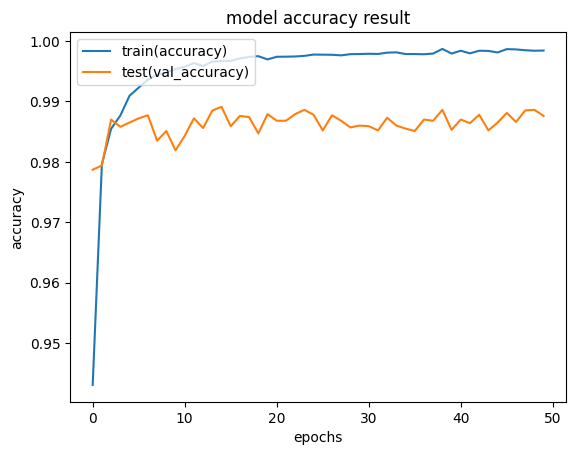

In [31]:
# 훈련결과 그래프 표시
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy result')
plt.ylabel('accuracy') # y축
plt.xlabel('epochs') # x축
plt.legend(['train(accuracy)', 'test(val_accuracy)'], loc = 'upper left')
# plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()

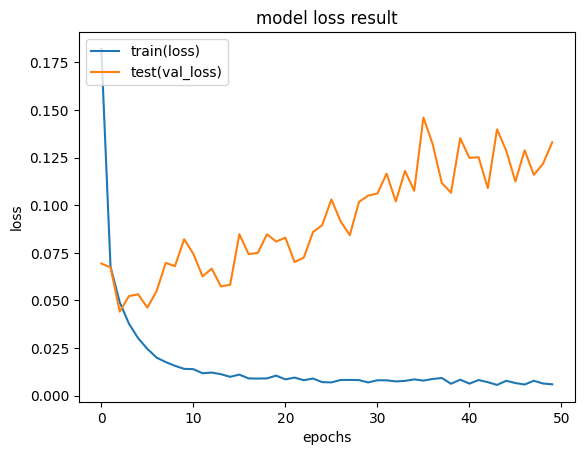

In [32]:
# 훈련결과 그래프 표시
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss result')
plt.ylabel('loss') # y축
plt.xlabel('epochs') # x축
plt.legend(['train(loss)', 'test(val_loss)'], loc = 'upper left')
# plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')
plt.show()

# 5. 모델 적용하기(예측 : Predict)

In [33]:
# 모델 평가 - 문제와 답이 필요함
loss, acc = model.evaluate(test_images, test_labels, verbose=2) # verbose -> 1 : 보이게 / 2: 보이지 않게

313/313 - 1s - 3ms/step - accuracy: 0.9876 - loss: 0.1330


In [38]:
acc # 98.76%

0.9876000285148621

In [40]:
# 모델 예측 - 문제만 있으면 됨
result = model.predict(test_images) # 10,000개

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [43]:
result[5000]

array([1.38281875e-29, 1.81292580e-19, 3.99213954e-22, 1.00000000e+00,
       7.19171071e-34, 1.32578095e-15, 5.60544591e-25, 1.27679835e-20,
       1.65464339e-16, 1.73610397e-30], dtype=float32)

In [48]:
result_value = np.argmax(result[1234])

In [49]:
print("예측 결과값 = %d" % (result_value))

예측 결과값 = 8


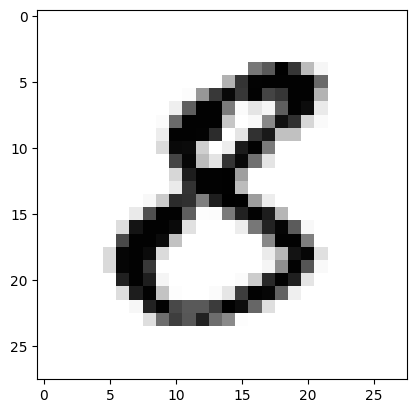

In [50]:
plt.imshow(test_images[1234], cmap = 'Greys')

In [ ]:
# 실제로 사용할 때 모델 저장부타 하면 됨 -> 학습은 이미 끝났음

In [51]:
# 모델 저장
model.save('mnist_cnn_20240517_epochs_50_9876.h5') # FileName : dqte, epochs, accuracy

# 6. 실제 데이터 파일 검증

In [53]:
# 이미지 불러오기
image = Image.open('6.jpg')

In [55]:
# 이미지 흑백으로
image = image.convert('L') # 대문자 L -> 컬러에서 흑백으로

In [58]:
# 인공지능에 들어갈 수 있는 형태로 변환
data = np.ndarray(shape=(1, 28, 28, 1), dtype = np.float32)
size = (28, 28)
image = ImageOps.fit(image, size, Image.LANCZOS) # 사이즈 맞춤 : 이미지, 사이즈, 옵션(Image.ANTIALIAS는 사라짐)

image_array = np.array(image)
# 전처리
nor_image_array = (image_array.astype(np.float32) / 255.) # or 127.) -1 
data = nor_image_array
img_data = data.reshape(1, 28, 28, 1)
img_data.shape

(1, 28, 28, 1)

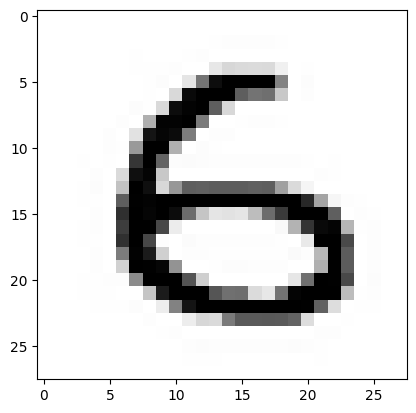

In [59]:
plt.imshow(image, cmap = 'Greys')

In [60]:
# 예측
result = model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [61]:
result

array([[3.5319815e-17, 8.4430869e-35, 0.0000000e+00, 0.0000000e+00,
        2.2788079e-26, 2.2093388e-13, 1.0000000e+00, 0.0000000e+00,
        1.2352133e-21, 1.5133417e-26]], dtype=float32)

In [62]:
rev_value = np.argmax(result)

In [63]:
print("실제 이미지 예측 결과 = %d" % (rev_value))

실제 이미지 예측 결과 = 6
